https://www.oreilly.com/catalog/errata.csp?isbn=0636920142874

In [13]:
import tensorflow as tf;
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt


print(f'tensorflow version: {tf.__version__}')
print(f'keras version: {keras.__version__}')
print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))

tensorflow version: 2.9.1
keras version: 2.9.0
Num GPUs Available:  1


In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [9]:
X_train_full.shape

(60000, 28, 28)

In [17]:
y_train_full.shape

(60000,)

In [19]:
# category of clothing
y_train_full[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [10]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [38]:
len(X_test)

10000

In [37]:
X_test[0].reshape(-1, 1)[0:300]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

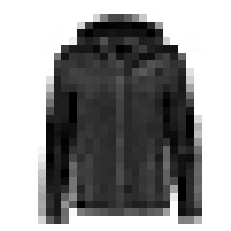

In [14]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [21]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [22]:
class_names[y_train[0]]

'Coat'

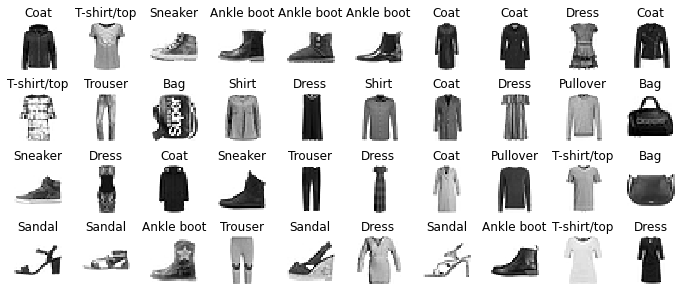

In [24]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [25]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


2022-07-07 03:04:10.575495: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-07 03:04:11.791734: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10399 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:05:00.0, compute capability: 6.1


In [26]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [27]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7115 - accuracy: 0.7623 - val_loss: 0.5706 - val_accuracy: 0.7936
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4900 - accuracy: 0.8298 - val_loss: 0.4874 - val_accuracy: 0.8278
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4457 - accuracy: 0.8450 - val_loss: 0.4237 - val_accuracy: 0.8516
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4160 - accuracy: 0.8531 - val_loss: 0.4140 - val_accuracy: 0.8562
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3952 - accuracy: 0.8605 - val_loss: 0.3911 - val_accuracy: 0.8620
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3774 - accuracy: 0.8669 - val_loss: 0.4035 - val_accuracy: 0.8548
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3646 - accuracy: 0.8704 - val_loss: 0.3742 - val_accuracy:

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

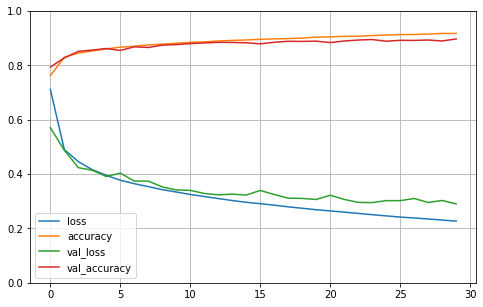

In [29]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [39]:
len(X_test)

10000

In [41]:
len(y_test)

10000

In [43]:
# use only 1 batch to calculate over entire test set
model.evaluate(X_test, y_test, batch_size=1)

10000/10000 [==============================] - 39s 4ms/step - loss: 0.3230 - accuracy: 0.8851


[0.3229767084121704, 0.8851000070571899]

In [44]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 77ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)